In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.core.operations import SymmOp
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
# Télécharge le ﬁchier CIF du matériau mp-9437 et le convertit en un dictionnaire afin d'accéder
# aux caractéristiques de la structure et en une structure de SpacegroupAnalyzer afin d'accéder 
# aux opérations de symétrie.

with MPRester("Dgm7hLo14n65cHTX") as m:

    structure = m.get_structure_by_material_id("mp-9437")   

structure_dict = structure.as_dict()
SA_structure = SpacegroupAnalyzer(structure)

## Maille originelle

On affiche d'abord la maille sans qu'aucune action de symétrie n'ait été appliquée. 

JsmolView(layout=Layout(align_self='stretch', height='400px'))

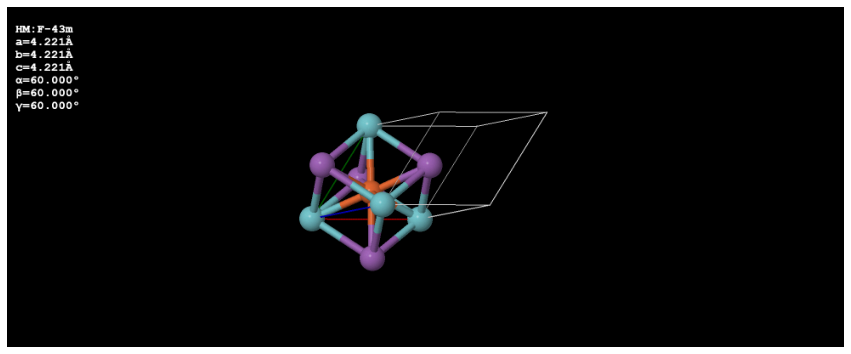


L'atome de Nb se trouve en :  [0.0, 0.0, 0.0]
L'atome de Fe se trouve en :  [0.25, 0.25, 0.25]
L'atome de Sb se trouve en :  [0.5, 0.5, 0.5]


In [3]:
# Visualisation de la maille originale

view1 = quick_view(structure)
display(view1)

# Pour une visualisation sur github

plt.figure(figsize = (15,15))
plt.imshow(imread('Maille.png'))
plt.axis("off")
plt.show()

# Obtention des coordonnées des différents atomes de la maille

Nb = structure_dict.get('sites')[0]['abc']
Fe = structure_dict.get('sites')[1]['abc']
Sb = structure_dict.get('sites')[2]['abc']

# Affichage des coordonnées des différents atomes de la maille

print("\nL'atome de Nb se trouve en : ", Nb)
print("L'atome de Fe se trouve en : ", Fe)
print("L'atome de Sb se trouve en : ", Sb)

## Symétrie pour l'atome de nobium

Pour ce premier atome, dont les coordonnées réduites sont $(0,0,0)$, on applique une réflexion du plan $(x,y,z)$.

JsmolView(layout=Layout(align_self='stretch', height='400px'))

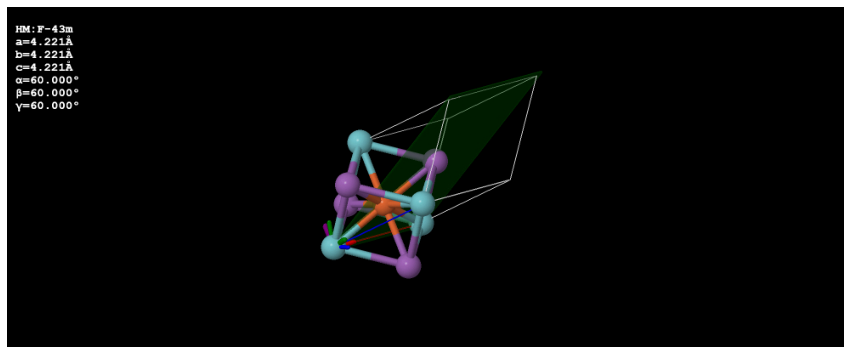

La matrice de la symétrie, Rot, et le vecteur de translation, tau : 
 Rot:
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
tau
[0. 0. 0.] 

Position originelle de l'atome de nobium :  [0.0, 0.0, 0.0] 

Position après réflexion de l'atome de nobium :  [0. 0. 0.]


In [4]:
# Choix de la symétrie

Nb_sym = SA_structure.get_symmetry_operations()[19]

# Affichage dans Jupyter Notebook

view2 = quick_view(structure)
display(view2)
view2.script("draw symop 20 {atomno=1}")

# Pour une visualisation sur github

plt.figure(figsize = (15,15))
plt.imshow(imread('Nb_sym.png'))
plt.axis("off")
plt.show()

# Affichage des caractéristiques de la symétrie

print("La matrice de la symétrie, Rot, et le vecteur de translation, tau : \n", Nb_sym, "\n")

print("Position originelle de l'atome de nobium : ", Nb, "\n")

print("Position après réflexion de l'atome de nobium : ", Nb_sym.operate(Nb))

## Symétrie pour l'atome de fer

Pour ce premier atome, dont les coordonnées réduites sont en $(0.25, 0.25, 0.25)$, on applique une rotation d'axe C3 : $(x,y,z)\to(x,z,-x-y-z)$.  

JsmolView(layout=Layout(align_self='stretch', height='400px'))

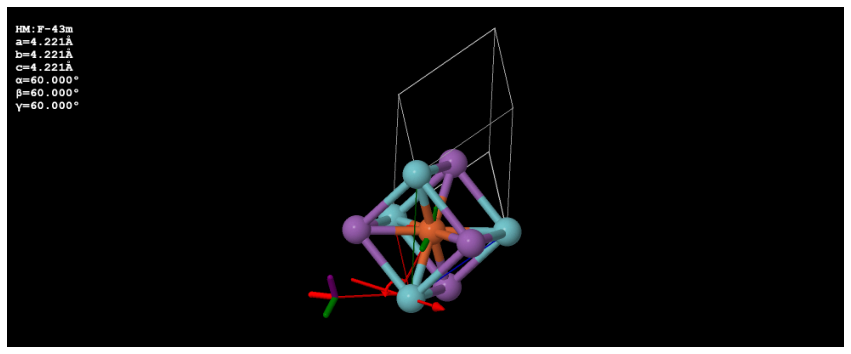

La matrice de la symétrie, Rot, et le vecteur de translation, tau : 
 Rot:
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [-1. -1. -1.]]
tau
[0. 0. 0.] 

Position originelle de l'atome de fer :  [0.25, 0.25, 0.25] 

Position après rotation de l'atome de fer :  [ 0.25  0.25 -0.75]


In [5]:
# Choix de la symétrie

Fe_sym = SA_structure.get_symmetry_operations()[22]

# Affichage dans Jupyter Notebook

view3 = quick_view(structure)
view3.script("draw symop 23 {atomno=2}")
display(view3)

# Pour une visualisation sur github

plt.figure(figsize = (15,15))
plt.imshow(imread('Fe_sym.png'))
plt.axis("off")
plt.show()

# Affichage des caractéristiques de la symétrie

print("La matrice de la symétrie, Rot, et le vecteur de translation, tau : \n", Fe_sym, "\n")

print("Position originelle de l'atome de fer : ", Fe, "\n")

print("Position après rotation de l'atome de fer : ", Fe_sym.operate(Fe))

## Symétrie pour l'atome d'antimoine

Pour ce premier atome, dont les coordonnées réduites sont en $(0.5,0.5,0.5)$, on applique une roto-inversion telle que : $(x,y,z)\to(z,x,-x-y-z)$

JsmolView(layout=Layout(align_self='stretch', height='400px'))

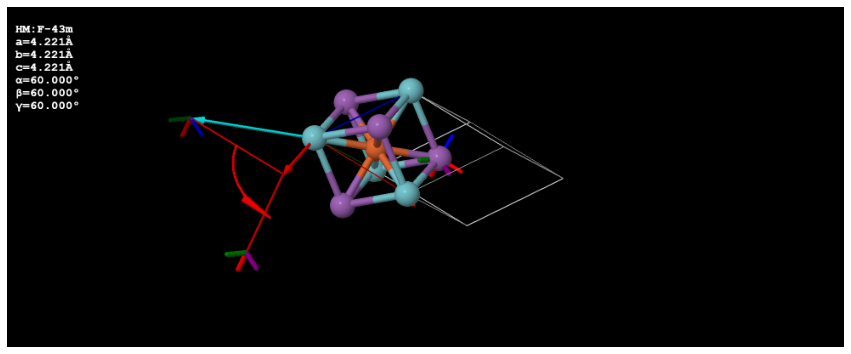

La matrice de la symétrie, Rot, et le vecteur de translation, tau : 
 Rot:
[[ 0.  0.  1.]
 [ 1.  0.  0.]
 [-1. -1. -1.]]
tau
[0. 0. 0.] 

Position originelle de l'atome d'antimoine' :  [0.5, 0.5, 0.5] 

Position après roto-inversion de l'atome d'antimoine :  [ 0.5  0.5 -1.5]


In [6]:
# Choix de la symétrie

Sb_sym = SA_structure.get_symmetry_operations()[17]

# Affichage dans Jupyter Notebook

view4 = quick_view(structure)
display(view4)
view4.script("draw symop 18 {atomno=3}")

# Pour une visualisation sur github

plt.figure(figsize = (15,15))
plt.imshow(imread('Sb_sym.png'))
plt.axis("off")
plt.show()

# Affichage des caractéristiques de la symétrie

print("La matrice de la symétrie, Rot, et le vecteur de translation, tau : \n", Sb_sym, "\n")

print("Position originelle de l'atome d'antimoine' : ", Sb, "\n")

print("Position après roto-inversion de l'atome d'antimoine : ", Sb_sym.operate(Sb))

Pour les 3 symétries montrées ci-dessus, on remarque que les coordonnées d'après rotation ne sont que la somme des coordonnées originelles de l'atome avec une combinaison linéaire des vecteurs de base :
\begin{align*}
\text{Nobium : } [0.0, 0.0, 0.0] = [0.0, 0.0, 0.0] + 0\,[1, 0, 0] + 0\, [0, 1, 0] + 0\, [0, 0, 1] \\
\text{Fer : } [ 0.25,  0.25, -0.75] = [0.25, 0.25, 0.25]  + 0\,[1, 0, 0] + 0 \,[0, 1, 0] + -1\, [0, 0, 1] \\
\text{Antimoine : } [ 0.5,  0.5, -1.5] = [0.5, 0.5, 0.5] + 0\,[1, 0, 0] + 0 \,[0, 1, 0] + -2\, [0, 0, 1] \\
\end{align*}

Ceci prouve que les opérations effectuées sont bien des opérations de symétrie sur la maille.